# Ford's GoBike Program Data Exploration

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics I will look into two DataFrames as would lke to compare year to year
df_18 = pd.read_csv('201810-fordgobike-tripdata.csv')
df_19 = pd.read_csv('201910-baywheels-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df_18.shape)
print(df_18.dtypes)
print(df_18.head(10))

(201458, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         80066  2018-10-31 20:49:03.1400  2018-11-01 19:03:30.0550   
1         56428  2018-10-31 20:18:02.8810  2018-11-01 11:58:31.1460   
2         44825  2018-10-31 20:07:13.3780  2018-11-01 08:34:19.3670   
3         55461  2018-10-31 17:06:37.6830  2018-11-01 08:30:59.2200   
4         47724  2018-10-31 18:27:36.8230  2018-11-01 07:4

In [4]:
# high-level overview of data shape and composition
print(df_19.shape)
print(df_19.dtypes)
print(df_19.head(10))

(239895, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         62337  2019-10-31 16:25:01.5970  2019-11-01 09:43:59.0290   
1         72610  2019-10-31 13:04:11.1950  2019-11-01 09:14:21.8050   
2         56636  2019-10-31 17:17:37.6480  2019-11-01 09:01:33.7720   
3         42250  2019-10-31 20:11:11.1270  2019-11-01 07:55:21.7440   
4         40076  2019-10-31 18:48:32.1410  2019-11-01 05:5

In [5]:
# I will now concate the dataframes as I would like compare year to year data 
df = pd.concat([df_19, df_18]) 

In [6]:
df.shape

(441353, 16)

In [7]:
# High-level overview of data shape and composition
print(df.shape)
print(df.dtypes)

print(df.head(10))


(441353, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         62337  2019-10-31 16:25:01.5970  2019-11-01 09:43:59.0290   
1         72610  2019-10-31 13:04:11.1950  2019-11-01 09:14:21.8050   
2         56636  2019-10-31 17:17:37.6480  2019-11-01 09:01:33.7720   
3         42250  2019-10-31 20:11:11.1270  2019-11-01 07:55:21.7440   
4         40076  2019-10-31 18:48:32.1410  2019-11-01 05:5

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441353 entries, 0 to 201457
Data columns (total 16 columns):
duration_sec               441353 non-null int64
start_time                 441353 non-null object
end_time                   441353 non-null object
start_station_id           439997 non-null float64
start_station_name         439997 non-null object
start_station_latitude     441353 non-null float64
start_station_longitude    441353 non-null float64
end_station_id             439997 non-null float64
end_station_name           439997 non-null object
end_station_latitude       441353 non-null float64
end_station_longitude      441353 non-null float64
bike_id                    441353 non-null int64
user_type                  441353 non-null object
member_birth_year          382482 non-null float64
member_gender              382497 non-null object
bike_share_for_all_trip    441353 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 57.2+ MB


In [9]:
# Check if duplicates exist
df.duplicated().sum()

0

In [10]:
# Visual assesemt of data
df.sample(30)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
187681,201,2018-10-02 19:47:08.8360,2018-10-02 19:50:29.8410,72.0,Page St at Scott St,37.772406,-122.435650,71.0,Broderick St at Oak St,37.773063,-122.439078,4442,Subscriber,1964.0,Male,No
98075,525,2018-10-16 17:26:00.1590,2018-10-16 17:34:45.3820,134.0,Valencia St at 24th St,37.752428,-122.420628,145.0,29th St at Church St,37.743684,-122.426806,4319,Subscriber,1969.0,Female,No
65380,198,2018-10-22 07:27:58.7700,2018-10-22 07:31:17.0650,126.0,Esprit Park,37.761634,-122.390648,104.0,4th St at 16th St,37.767045,-122.390833,3579,Subscriber,1981.0,Male,No
69217,425,2019-10-23 07:40:11.4410,2019-10-23 07:47:17.1620,90.0,Townsend St at 7th St,37.771058,-122.402717,104.0,4th St at 16th St,37.767045,-122.390833,12830,Subscriber,1987.0,Male,No
183991,867,2019-10-08 08:16:16.0420,2019-10-08 08:30:43.6670,129.0,Harrison St at 20th St,37.758862,-122.412544,80.0,Townsend St at 5th St,37.775235,-122.397437,11693,Customer,1976.0,Male,No
70490,453,2018-10-20 16:23:59.0750,2018-10-20 16:31:32.0760,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1538,Subscriber,1986.0,Female,No
123777,419,2018-10-12 09:52:52.4930,2018-10-12 09:59:51.9430,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,114.0,Rhode Island St at 17th St,37.764478,-122.402570,4442,Subscriber,1983.0,Female,No
63828,519,2019-10-23 17:09:20.1840,2019-10-23 17:17:59.7900,16.0,Steuart St at Market St,37.794130,-122.394430,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,11853,Customer,NaN,NaN,No
133292,348,2019-10-14 18:09:35.8470,2019-10-14 18:15:24.4300,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,12420,Subscriber,1952.0,Male,No
7870,1599,2018-10-30 19:58:25.4350,2018-10-30 20:25:04.6510,120.0,Mission Dolores Park,37.761420,-122.426435,137.0,Jersey St at Castro St,37.750506,-122.433950,290,Customer,1995.0,Male,No


In [11]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,441353.000000,439997.000000,441353.000000,441353.000000,439997.000000,441353.000000,441353.000000,441353.000000,382482.000000
mean,816.726276,142.718687,37.766841,-122.352492,138.142821,37.766066,-122.348595,5687.361044,1984.544726
std,1971.316201,122.108063,0.104291,0.121988,121.080856,0.215393,0.622718,4539.932477,10.161686
min,61.000000,3.000000,37.309014,-122.495241,3.000000,0.000000,-122.495241,11.000000,1888.000000
25%,366.000000,43.000000,37.770030,-122.411901,34.000000,37.770407,-122.410807,1808.000000,1980.000000
50%,578.000000,100.000000,37.780526,-122.398285,97.000000,37.780760,-122.397380,3482.000000,1987.000000
75%,890.000000,239.000000,37.795392,-122.294837,230.000000,37.795393,-122.299371,10457.000000,1992.000000
max,86205.000000,482.000000,37.880222,-121.864021,482.000000,37.880222,0.000000,13112.000000,2001.000000


# Assessing Data

In [12]:
df['member_birth_year'].value_counts()

1988.0    22000
1989.0    19755
1990.0    19574
1993.0    19415
1991.0    18551
          ...  
1938.0        7
1934.0        6
1896.0        6
1920.0        4
1932.0        2
Name: member_birth_year, Length: 78, dtype: int64

In [13]:
# member_birth_year 

plt.figure(figsize = [10, 4])
# base_color = sb.color_palette()[0]

sb.boxplot(data=df, x='member_birth_year', color=base_color);

NameError: name 'base_color' is not defined

<Figure size 720x288 with 0 Axes>

there are birth dates prior to 1900

In [ ]:
df.info()

- start_time  and end_time are objects and should be converted into timestamps also user_type, gender and bike_share_for_all_trip can be set to category or converted into numeric values
- drop all NaN

In [14]:
df['user_type'].value_counts()

Subscriber    360072
Customer       81281
Name: user_type, dtype: int64

In [15]:
df['member_gender'].value_counts()

Male      283128
Female     93474
Other       5895
Name: member_gender, dtype: int64

### Quality issues
    - start time and end time are objects
    - user type, gender and bike_share_for_all_trip can be set to category
    - bike id, start_station_id, end_station_id can be set to object
    - member birth year has dates prior to 1900
### Tidyness 
    - columns_to_drop = ['start_station_latitude', 'start_station_longitude',
                 'end_station_latitude', 'end_station_longitude']
    - drop age outlieres

# Cleaning Data

In [16]:
# Copy of original DataFrame
df_clean = df.copy()

In [17]:
df_clean.shape

(441353, 16)

### Define 
Drop NaN from data set
### Code

In [18]:
df_clean = df_clean.dropna(axis=0, how='any')

### Test

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381163 entries, 3 to 201457
Data columns (total 16 columns):
duration_sec               381163 non-null int64
start_time                 381163 non-null object
end_time                   381163 non-null object
start_station_id           381163 non-null float64
start_station_name         381163 non-null object
start_station_latitude     381163 non-null float64
start_station_longitude    381163 non-null float64
end_station_id             381163 non-null float64
end_station_name           381163 non-null object
end_station_latitude       381163 non-null float64
end_station_longitude      381163 non-null float64
bike_id                    381163 non-null int64
user_type                  381163 non-null object
member_birth_year          381163 non-null float64
member_gender              381163 non-null object
bike_share_for_all_trip    381163 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 49.4+ MB


### Define 
Set appropriate data types
### Code

In [20]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [21]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [22]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

### Test

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381163 entries, 3 to 201457
Data columns (total 16 columns):
duration_sec               381163 non-null int64
start_time                 381163 non-null datetime64[ns]
end_time                   381163 non-null datetime64[ns]
start_station_id           381163 non-null object
start_station_name         381163 non-null object
start_station_latitude     381163 non-null float64
start_station_longitude    381163 non-null float64
end_station_id             381163 non-null object
end_station_name           381163 non-null object
end_station_latitude       381163 non-null float64
end_station_longitude      381163 non-null float64
bike_id                    381163 non-null object
user_type                  381163 non-null category
member_birth_year          381163 non-null float64
member_gender              381163 non-null category
bike_share_for_all_trip    381163 non-null category
dtypes: category(3), datetime64[ns](2), float64(5), int64(1), o

In [24]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
3,42250,2019-10-31 20:11:11.127,2019-11-01 07:55:21.744,12623,19th Street BART Station,37.809369,-122.267951,12623,Lake Merritt BART Station,37.797320,-122.265320,12623,Subscriber,1997.0,Male,No
6,26418,2019-10-31 20:11:05.468,2019-11-01 03:31:23.909,12516,11th St at Natoma St,37.773507,-122.416040,12516,Market St at Dolores St,37.769305,-122.426826,12516,Customer,1985.0,Male,No
8,876,2019-10-31 23:54:26.559,2019-11-01 00:09:02.983,10803,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,10803,17th St at Valencia St,37.763316,-122.421904,10803,Subscriber,1979.0,Male,No
9,589,2019-10-31 23:56:16.496,2019-11-01 00:06:05.645,2434,Hyde St at Post St,37.787349,-122.416651,2434,Clay St at Battery St,37.795001,-122.399970,2434,Subscriber,1983.0,Male,No
10,347,2019-10-31 23:59:40.105,2019-11-01 00:05:27.105,2454,17th St at Valencia St,37.763316,-122.421904,2454,Church St at Duboce Ave,37.770083,-122.429156,2454,Customer,1986.0,Male,No


### Define 
member birth year has dates prior to 1900 so I will convert into age and cut off the outlieres
### Code


In [25]:
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

### Test

In [26]:
df_clean['member_age'].sample(5)

23681     28.0
191795    35.0
83266     35.0
53546     46.0
98147     31.0
Name: member_age, dtype: float64

In [27]:
df_clean['member_age'].value_counts()

31.0     21936
30.0     19648
29.0     19520
26.0     19312
28.0     18483
         ...  
81.0         7
85.0         6
123.0        6
99.0         4
87.0         2
Name: member_age, Length: 78, dtype: int64

### Define
cut off the outlieres
### Code

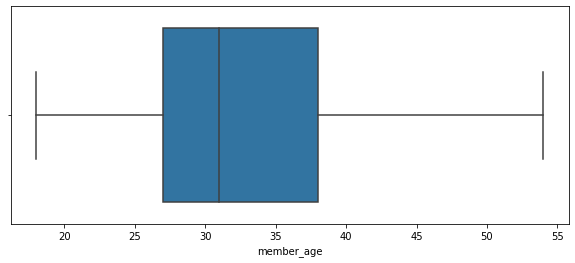

In [34]:
# member age

plt.figure(figsize = [10, 4])


sb.boxplot(data=df_clean, x='member_age');

In [32]:
# Keep records below 54
df_clean = df_clean.query('member_age <=54')

### Test

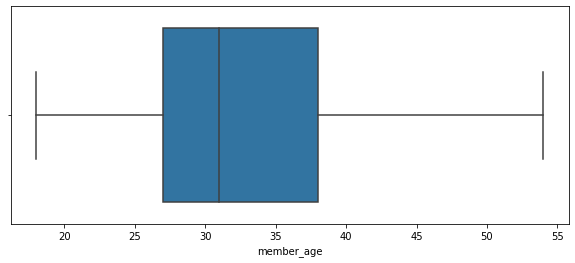

In [35]:
# member age

plt.figure(figsize = [10, 4])


sb.boxplot(data=df_clean, x='member_age');

In [233]:
df_clean.shape

(360840, 17)

### Define 
Dropiing colmns that I will not use
### Code

In [234]:
columns_to_drop = ['start_station_latitude', 'start_station_longitude',
                 'end_station_latitude', 'end_station_longitude']

df_clean.drop(columns = columns_to_drop, inplace = True)

### Test

In [235]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360840 entries, 3 to 201457
Data columns (total 13 columns):
duration_sec               360840 non-null int64
start_time                 360840 non-null datetime64[ns]
end_time                   360840 non-null datetime64[ns]
start_station_id           360840 non-null object
start_station_name         360840 non-null object
end_station_id             360840 non-null object
end_station_name           360840 non-null object
bike_id                    360840 non-null object
user_type                  360840 non-null category
member_birth_year          360840 non-null float64
member_gender              360840 non-null category
bike_share_for_all_trip    360840 non-null category
member_age                 360840 non-null float64
dtypes: category(3), datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 31.3+ MB


### Feature Engineering

    - we can calculate the age of the user into bins
    - we can further enhance the dataset with more details about the time like day, hour, weekday
    - there are NaN which I will drop as well thre is enough data

### Adding Age Bins


In [236]:
age_bins = [0, 19, 29, 39, 49, 59,
            69, 79, 89, 99]
age_labels = ['10 - 19', '20 - 29', '30 - 39', '40 - 49', '50 - 59',
              '60 - 69', '70 - 79', '80 - 89', '90 - 99']

df_clean['age_group'] = pd.cut(df_clean['member_age'], bins = age_bins, labels = age_labels, right = False)

In [237]:
df_clean[['member_age', 'age_group']].sample(10)

,member_age,age_group
149133,27.0,20 - 29
6005,28.0,20 - 29
210246,42.0,40 - 49
9750,35.0,30 - 39
158283,39.0,40 - 49
104657,48.0,40 - 49
61917,42.0,40 - 49
93484,46.0,40 - 49
58793,35.0,30 - 39
183783,53.0,50 - 59


In [238]:
df_clean['age_group'].value_counts()

30 - 39    157208
20 - 29    119976
40 - 49     61412
50 - 59     21675
10 - 19       569
90 - 99         0
80 - 89         0
70 - 79         0
60 - 69         0
Name: age_group, dtype: int64

### Extracting a timestamp field details

In [239]:
# extracting start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')
# extracting start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)
# extracting start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
# extracting start time hour
df_clean['year_month'] = pd.to_datetime(df_clean['start_time']).dt.to_period('M')

In [240]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group,start_time_weekday,start_time_day,start_time_hour,year_month
3,42250,2019-10-31 20:11:11.127,2019-11-01 07:55:21.744,12623,19th Street BART Station,12623,Lake Merritt BART Station,12623,Subscriber,1997.0,Male,No,22.0,20 - 29,Thu,31,20,2019-10
6,26418,2019-10-31 20:11:05.468,2019-11-01 03:31:23.909,12516,11th St at Natoma St,12516,Market St at Dolores St,12516,Customer,1985.0,Male,No,34.0,30 - 39,Thu,31,20,2019-10
8,876,2019-10-31 23:54:26.559,2019-11-01 00:09:02.983,10803,Civic Center/UN Plaza BART Station (Market St ...,10803,17th St at Valencia St,10803,Subscriber,1979.0,Male,No,40.0,40 - 49,Thu,31,23,2019-10
9,589,2019-10-31 23:56:16.496,2019-11-01 00:06:05.645,2434,Hyde St at Post St,2434,Clay St at Battery St,2434,Subscriber,1983.0,Male,No,36.0,30 - 39,Thu,31,23,2019-10
10,347,2019-10-31 23:59:40.105,2019-11-01 00:05:27.105,2454,17th St at Valencia St,2454,Church St at Duboce Ave,2454,Customer,1986.0,Male,No,33.0,30 - 39,Thu,31,23,2019-10


In [241]:
df_clean['start_time_hour'].value_counts()

8     44562
17    44010
18    34702
9     34459
16    26928
7     21003
19    20011
15    15949
10    15633
12    14770
13    14395
11    13808
14    13416
20    12961
21     9311
6      8172
22     6310
23     3635
5      2076
0      2047
1      1176
2       778
3       368
4       360
Name: start_time_hour, dtype: int64

### CONVERTING duration_sec: into minutes 

In [242]:
# coverting sec to 
df_clean['duration_min'] = df_clean['duration_sec'] / 60

In [243]:
df_clean[['duration_min', 'duration_sec']].sample(10)

,duration_min,duration_sec
126239,4.550000,273
210243,15.133333,908
220874,16.816667,1009
116730,14.933333,896
236335,13.800000,828
125003,13.433333,806
98658,4.066667,244
67770,13.766667,826
71946,2.983333,179
193572,4.466667,268


### Saving Clean Master Dataset

In [251]:
#Saving clean master dataset
df_clean.to_csv('fordgobike_baywheels_master.csv', index = False)

In [252]:
dfe = pd.read_csv('fordgobike_baywheels_master.csv')

In [253]:
dfe.shape

(360840, 19)

In [254]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360840 entries, 0 to 360839
Data columns (total 19 columns):
duration_sec               360840 non-null int64
start_time                 360840 non-null object
end_time                   360840 non-null object
start_station_id           360840 non-null int64
start_station_name         360840 non-null object
end_station_id             360840 non-null int64
end_station_name           360840 non-null object
bike_id                    360840 non-null int64
user_type                  360840 non-null object
member_birth_year          360840 non-null float64
member_gender              360840 non-null object
bike_share_for_all_trip    360840 non-null object
member_age                 360840 non-null float64
age_group                  360840 non-null object
start_time_weekday         360840 non-null object
start_time_day             360840 non-null int64
start_time_hour            360840 non-null int64
year_month                 360840 non-null 

### What is the structure of your dataset?

There are 360840 bike rides in the dataset with 18 features <br>

duration_sec               360840 non-null int64 <br>
start_time                 360840 non-null object <br>
end_time                   360840 non-null object <br>
start_station_id           360840 non-null int64 <br>
start_station_name         360840 non-null object <br>
end_station_id             360840 non-null int64 <br>
end_station_name           360840 non-null object <br>
bike_id                    360840 non-null int64 <br>
user_type                  360840 non-null object <br>
member_birth_year          360840 non-null float64<br>
member_gender              360840 non-null object<br>
bike_share_for_all_trip    360840 non-null object<br>
member_age                 360840 non-null float64<br>
age_group                  360840 non-null object<br>
start_time_weekday         360840 non-null object<br>
start_time_day             360840 non-null int64<br>
start_time_hour            360840 non-null int64<br>
duration_min               360840 non-null float64<br>

Most variables are numeric in nature, but the variables start_station_name, end_station_name,user_type and member_gender and bike_share_for_all_trip they're not and some can be encoded into:

member_gender: 0/1 <br>
bike_share_for_all_trip: True/False <br>


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out are there any diffrence bwtween 2019-10 and 2018-10 so will look into each feature and compare the trends.

Is there any diffrence when and where bikes are high in demand between 2018-10 and 2019-10. Is there diffrence in age range and gender that uses the service the most and if there is a diffrence in the service used by subscribers or non subscribers between 2018-10 and 2019-10.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that time stamp will have the strongest effect on bike renting also location and datetime will have the strongest effect on bike demand but would like to understand if there is any diffrence in month to month comaprison



# Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: day.

In [256]:
dfe.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group,start_time_weekday,start_time_day,start_time_hour,year_month,duration_min
0,42250,2019-10-31 20:11:11.127,2019-11-01 07:55:21.744,12623,19th Street BART Station,12623,Lake Merritt BART Station,12623,Subscriber,1997.0,Male,No,22.0,20 - 29,Thu,31,20,2019-10,704.166667
1,26418,2019-10-31 20:11:05.468,2019-11-01 03:31:23.909,12516,11th St at Natoma St,12516,Market St at Dolores St,12516,Customer,1985.0,Male,No,34.0,30 - 39,Thu,31,20,2019-10,440.300000
2,876,2019-10-31 23:54:26.559,2019-11-01 00:09:02.983,10803,Civic Center/UN Plaza BART Station (Market St ...,10803,17th St at Valencia St,10803,Subscriber,1979.0,Male,No,40.0,40 - 49,Thu,31,23,2019-10,14.600000
3,589,2019-10-31 23:56:16.496,2019-11-01 00:06:05.645,2434,Hyde St at Post St,2434,Clay St at Battery St,2434,Subscriber,1983.0,Male,No,36.0,30 - 39,Thu,31,23,2019-10,9.816667
4,347,2019-10-31 23:59:40.105,2019-11-01 00:05:27.105,2454,17th St at Valencia St,2454,Church St at Duboce Ave,2454,Customer,1986.0,Male,No,33.0,30 - 39,Thu,31,23,2019-10,5.783333


In [274]:
# I will split the data set into 2018 and 2019
df18 = dfe.query('year_month == "2018-10"')
df19 = dfe.query('year_month == "2019-10"')

In [275]:
df19.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group,start_time_weekday,start_time_day,start_time_hour,year_month,duration_min
166858,1230,2019-10-02 19:41:37.619,2019-10-02 20:02:08.498,9832,Jones St at Post St,9832,Precita Park,9832,Subscriber,1994.0,Male,No,25.0,20 - 29,Wed,2,19,2019-10,20.500000
79730,322,2019-10-17 19:59:03.872,2019-10-17 20:04:26.270,12644,Telegraph Ave at 23rd St,12644,Isabella St at San Pablo Ave,12644,Subscriber,1978.0,Male,No,41.0,40 - 49,Thu,17,19,2019-10,5.366667
101546,767,2019-10-14 17:40:34.174,2019-10-14 17:53:21.308,12613,The Embarcadero at Vallejo St,12613,San Francisco Caltrain Station (King St at 4th...,12613,Subscriber,1971.0,Female,No,48.0,40 - 49,Mon,14,17,2019-10,12.783333
99939,323,2019-10-14 22:19:47.514,2019-10-14 22:25:11.388,12164,22nd St Caltrain Station,12164,4th St at Mission Bay Blvd S,12164,Subscriber,1988.0,Male,No,31.0,30 - 39,Mon,14,22,2019-10,5.383333
140658,232,2019-10-07 19:01:48.394,2019-10-07 19:05:40.750,12216,Haste St at College Ave,12216,Russell St at College Ave,12216,Subscriber,1986.0,Male,No,33.0,30 - 39,Mon,7,19,2019-10,3.866667
161881,1623,2019-10-03 16:31:41.947,2019-10-03 16:58:45.844,549,Fulton St at Bancroft Way,549,19th Street BART Station,549,Subscriber,1981.0,Female,No,38.0,30 - 39,Thu,3,16,2019-10,27.050000
143792,1414,2019-10-07 10:49:20.771,2019-10-07 11:12:55.329,12535,Powell St BART Station (Market St at 4th St),12535,Garfield Square (25th St at Harrison St),12535,Subscriber,1985.0,Female,No,34.0,30 - 39,Mon,7,10,2019-10,23.566667
22400,185,2019-10-28 16:53:23.838,2019-10-28 16:56:29.077,11160,Mississippi St at 17th St,11160,4th St at 16th St,11160,Subscriber,1982.0,Male,No,37.0,30 - 39,Mon,28,16,2019-10,3.083333
31057,2396,2019-10-26 09:44:43.663,2019-10-26 10:24:40.531,12105,Sanchez St at 17th St,12105,Sanchez St at 17th St,12105,Subscriber,1997.0,Male,No,22.0,20 - 29,Sat,26,9,2019-10,39.933333
74415,305,2019-10-18 17:49:22.199,2019-10-18 17:54:27.313,755,MacArthur BART Station,755,Broadway at 40th St,755,Subscriber,1992.0,Male,No,27.0,20 - 29,Fri,18,17,2019-10,5.083333


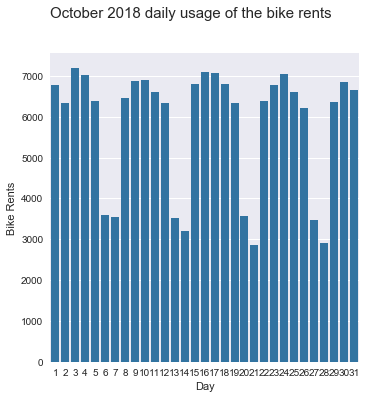

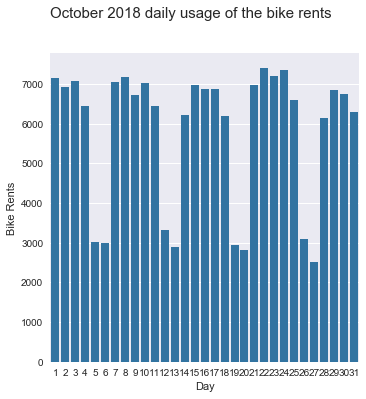

In [455]:
# month OCct 2018 to month Oct 2019 usege of the bikes
plot_color = sb.color_palette()[0]

d18 = sb.catplot(data=df18, x='start_time_day', kind='count', color = plot_color)
d18.set_axis_labels("Day", "Bike Rents")
d18.fig.suptitle('October 2018 daily usage of the bike rents', y=1.05, fontsize=15);

d19 = sb.catplot(data=df19, x='start_time_day', kind='count', color = plot_color)
d19.set_axis_labels("Day", "Bike Rents")
d19.fig.suptitle('October 2018 daily usage of the bike rents', y=1.05, fontsize=15);

Now let's take a look on weekly usage and if there is a diffrence between Oct 18 and Oct 19

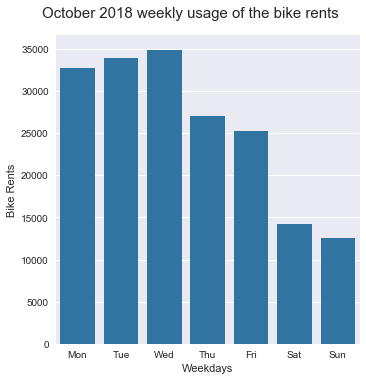

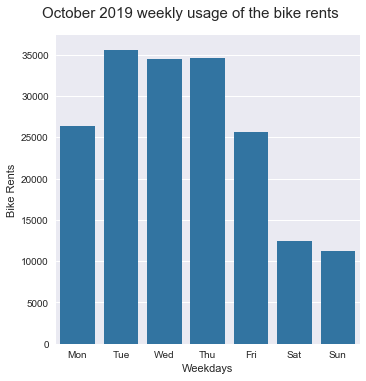

In [457]:
# weekday rents of the bikes

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
d18 = sb.catplot(data=df18, x='start_time_weekday', kind='count', color = plot_color, order = weekday)
d18.set_axis_labels("Weekdays", "Bike Rents")
d18.fig.suptitle('October 2018 weekly usage of the bike rents', y=1.05, fontsize=15);

d19 = sb.catplot(data=df19, x='start_time_weekday', kind='count', color = plot_color, order = weekday)
d19.set_axis_labels("Weekdays", "Bike Rents")
d19.fig.suptitle('October 2019 weekly usage of the bike rents', y=1.05, fontsize=15);

The bike share system is mainly used during weekdays, the most popular days for bike rides in October 2018 are Monday - Wednesday and Tuesday - Thursday in October 2019. It's intresting change of trend. The system is least  used during weekends.

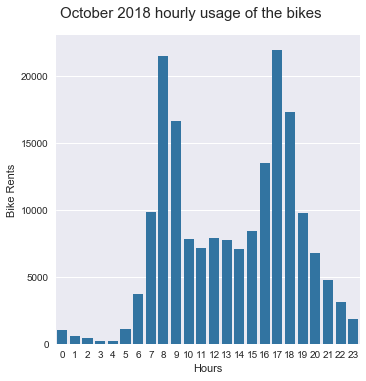

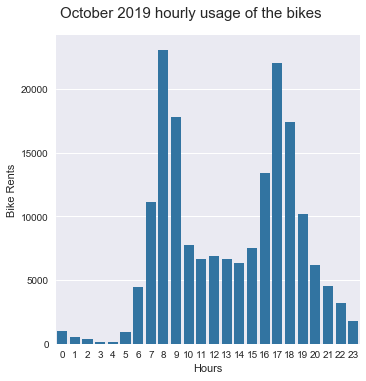

In [484]:
# hourly useage of a bikes

d18 = sb.catplot(data=df18, x='start_time_hour', kind='count', color = plot_color)
d18.set_axis_labels("Hours", "Bike Rents")
d18.fig.suptitle('October 2018 hourly usage of the bikes', y=1.05, fontsize=15);

d19 = sb.catplot(data=df19, x='start_time_hour', kind='count', color = plot_color)
d19.set_axis_labels("Hours", "Bike Rents")
d19.fig.suptitle('October 2019 hourly usage of the bikes', y=1.05, fontsize=15);

Bikes are mostly used between 7-9 and 16-19 and there's no diffrence between Oct'18 and Oct'19

Now let's take a look into duration of bike rents

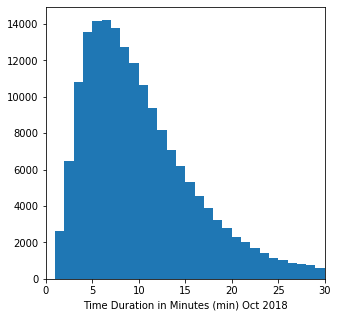

In [371]:
#  duration of bike rents Oct 2019

bins = np.arange(0, df18['duration_min'].max()+1, 1)
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(data = df18, x = 'duration_min', bins = bins)
plt.xlim([0,30])
plt.xlabel('Time Duration in Minutes (min) Oct 2018');


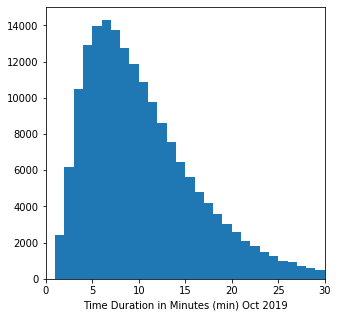

In [370]:
#  duration of bike rents Oct 2019

bins = np.arange(0, df19['duration_min'].max()+1, 1)
plt.rcParams["figure.figsize"] = (5,5)
plt.hist(data = df19, x = 'duration_min', bins = bins)
plt.xlim([0,30])
plt.xlabel('Time Duration in Minutes (min) Oct 2019');

There is no significant diffrence between Oct 2019 and Oct 2018 in rent duration <br>
Now let's take a look into user types and iifrence between Oct 18 and Oct 19

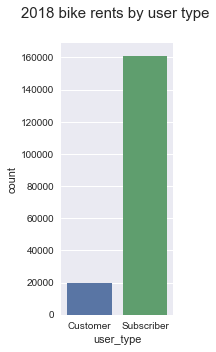

In [460]:
#  User type bike rents Oct 2018
ut = ['Customer', 'Subscriber']
plt.rcParams["figure.figsize"] = (2,5)
sb.countplot(data=df18,x='user_type', order = ut)
plt.suptitle('2018 bike rents by user type', fontsize=15);

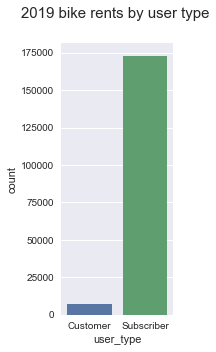

In [461]:
#  User type bike rents Oct 2019
plt.rcParams["figure.figsize"] = (2,5)
sb.countplot(data=df19,x='user_type',order = ut)
plt.suptitle('2019 bike rents by user type', fontsize=15);

There is  diffrence between Oct 18 and Oct 19 - Oct 19 has much more rents by subscribers and less by Customers then Oct 18.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations? <br>
I did not have to perform any transformation or maybe one whreI have converted seconds in the minutes as this is more understable figures for common reader<br>
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?<br>
Yes I had to tidy the data due to qulaity issues as well as did some feature engenring.  I have converted DOB int age and then add the bins. Also I had to remove outlires due to fact that some useres had over 100 years. The data showed that the best would be keep only users <=57. ALso I have exctracted month day from timestamp so the visulaziation would be much better. 

# Bivariate Exploration

Let's first plot initial univariate investigation of the data wanting to look at the relationship between many pairs of variables. 

In [375]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180534 entries, 180306 to 360839
Data columns (total 19 columns):
duration_sec               180534 non-null int64
start_time                 180534 non-null object
end_time                   180534 non-null object
start_station_id           180534 non-null int64
start_station_name         180534 non-null object
end_station_id             180534 non-null int64
end_station_name           180534 non-null object
bike_id                    180534 non-null int64
user_type                  180534 non-null object
member_birth_year          180534 non-null float64
member_gender              180534 non-null object
bike_share_for_all_trip    180534 non-null object
member_age                 180534 non-null float64
age_group                  180534 non-null object
start_time_weekday         180534 non-null object
start_time_day             180534 non-null int64
start_time_hour            180534 non-null int64
year_month                 180534 non-

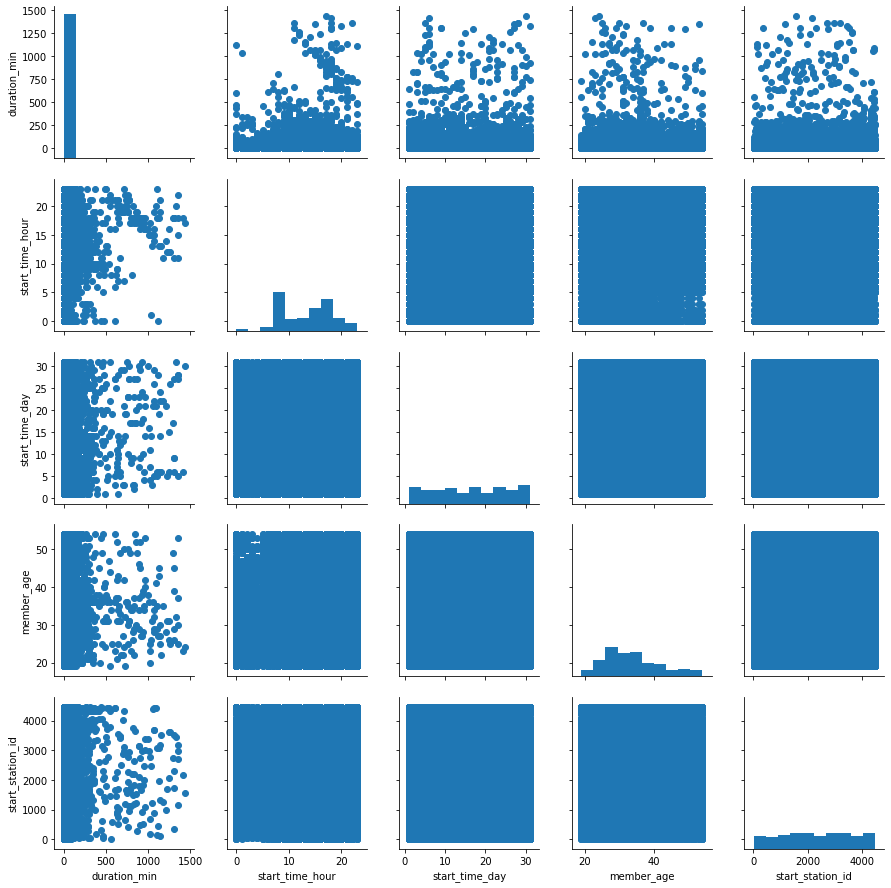

In [377]:
g = sb.PairGrid(data = df18, vars = ['duration_min', 'start_time_hour', 'start_time_day', 'member_age','start_station_id'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

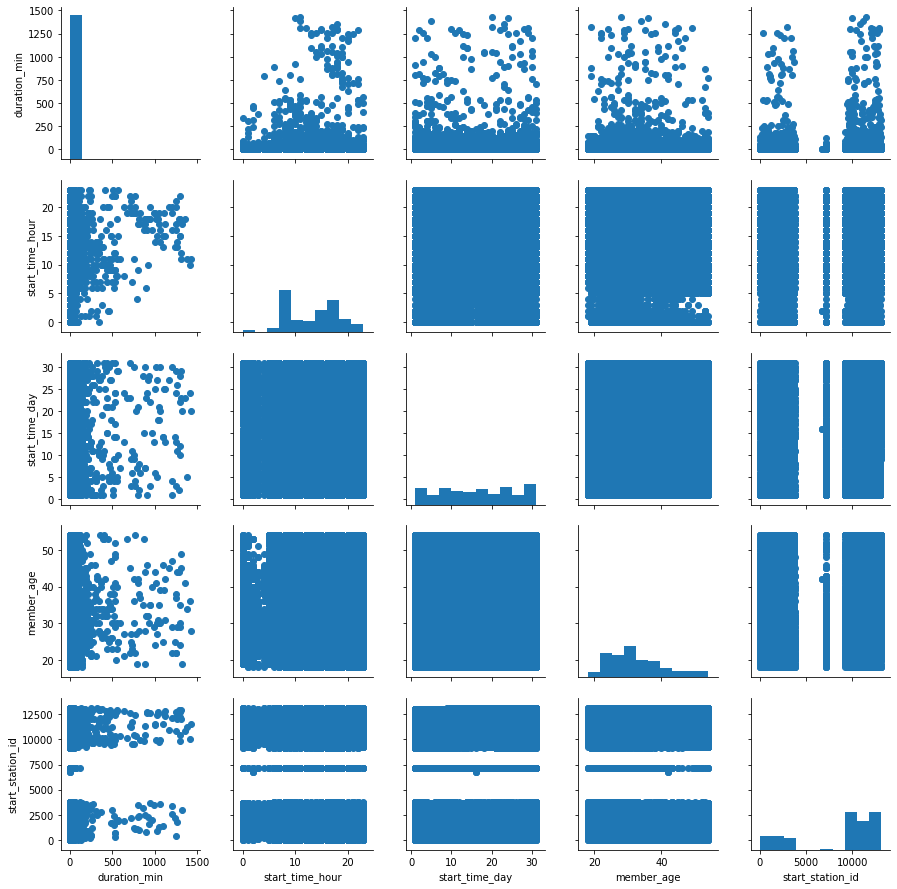

In [378]:
g = sb.PairGrid(data = df19, vars = ['duration_min', 'start_time_hour', 'start_time_day', 'member_age','start_station_id'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

Well they don't tell much so I will discard them at this stage and do more detaild exploration

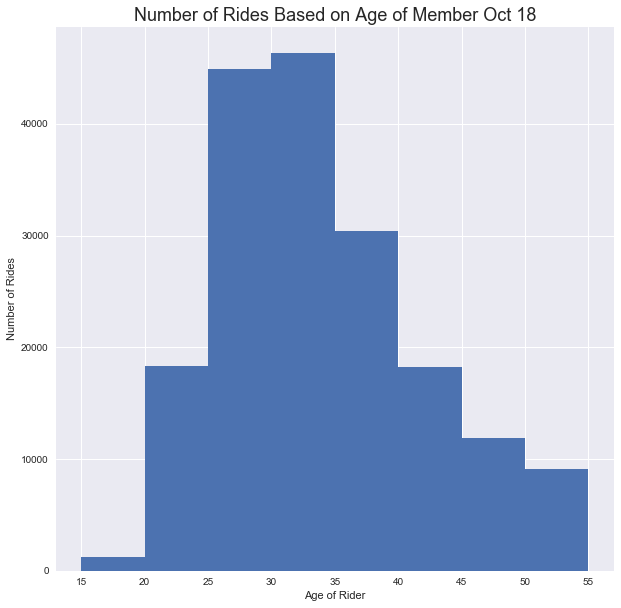

In [462]:
#Visualizing the data in a histogram
age_bins = np.arange(15, 60, 5)
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(data = df18, x = 'member_age', bins = age_bins);

plt.title('Number of Rides Based on Age of Member Oct 18', fontsize = 18);
plt.xlabel('Age of Rider');
plt.ylabel('Number of Rides');

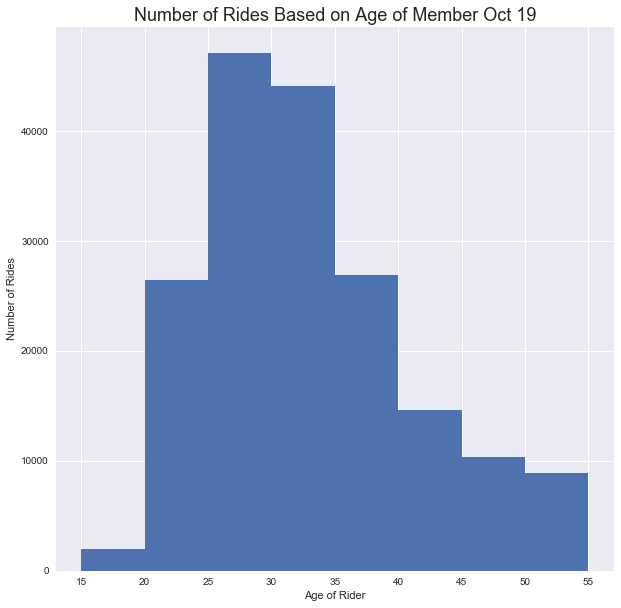

In [463]:
#Visualizing the data in a histogram
age_bins = np.arange(15, 60, 5)
plt.rcParams["figure.figsize"] = (10,10)
plt.hist(data = df19, x = 'member_age', bins = age_bins);

plt.title('Number of Rides Based on Age of Member Oct 19', fontsize = 18);
plt.xlabel('Age of Rider');
plt.ylabel('Number of Rides');

There is a increase of bike rents on October 2019 in group of useres with age between 25-30

Now I will explore the bike rent trends per each user type.


In [467]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180534 entries, 180306 to 360839
Data columns (total 19 columns):
duration_sec               180534 non-null int64
start_time                 180534 non-null object
end_time                   180534 non-null object
start_station_id           180534 non-null int64
start_station_name         180534 non-null object
end_station_id             180534 non-null int64
end_station_name           180534 non-null object
bike_id                    180534 non-null int64
user_type                  180534 non-null object
member_birth_year          180534 non-null float64
member_gender              180534 non-null object
bike_share_for_all_trip    180534 non-null object
member_age                 180534 non-null float64
age_group                  180534 non-null object
start_time_weekday         180534 non-null object
start_time_day             180534 non-null int64
start_time_hour            180534 non-null int64
year_month                 180534 non-

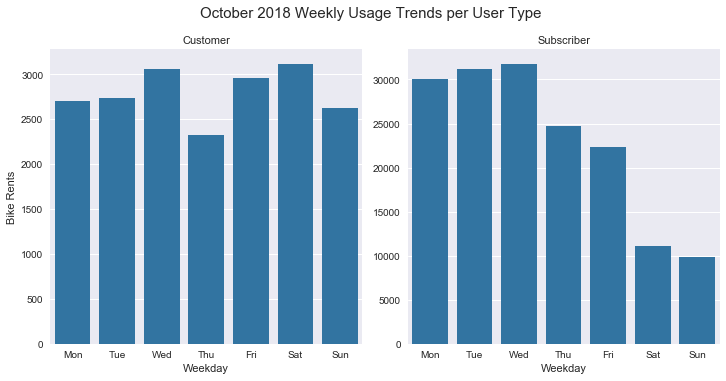

In [471]:
# ploting the Usage Trends per User Type
d18 = sb.catplot(data=df18, x='start_time_weekday', col="user_type", kind='count',color = plot_color, sharey = False, order = weekday)
d18.set_axis_labels("Weekday", "Bike Rents")
d18.set_titles("{col_name}")
d18.fig.suptitle('October 2018 Weekly Usage Trends per User Type', y=1.05, fontsize=15);

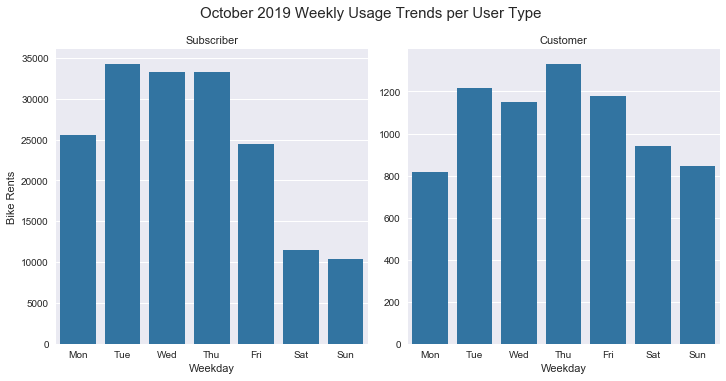

In [472]:
# ploting the Usage Trends per User Type
d19 = sb.catplot(data=df19, x='start_time_weekday', col="user_type", kind='count', sharey = False,
           color = plot_color, order = weekday)
d19.set_axis_labels("Weekday", "Bike Rents")
d19.set_titles("{col_name}")
d19.fig.suptitle('October 2019 Weekly Usage Trends per User Type', y=1.05, fontsize=15);

Customers tend to rent bikes more often during weekends than Subscribers

Now time to explore trends of hours usage by user type and look for any diffrence between October 2018 and 2019


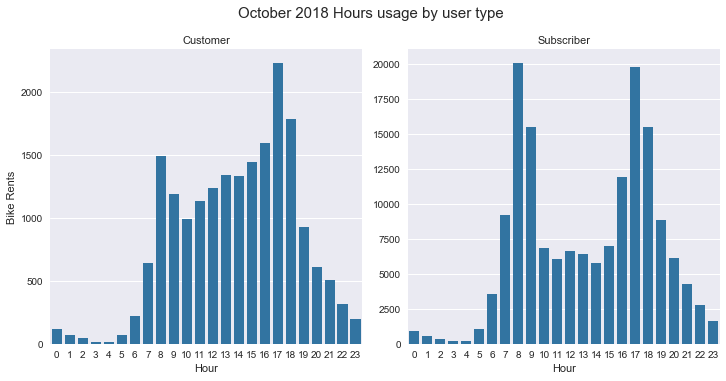

In [482]:
g = sb.catplot(data=df18, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = plot_color)
g.set_axis_labels("Hour", "Bike Rents")
g.set_titles("{col_name}")
g.fig.suptitle('October 2018 Hours usage by user type', y=1.05, fontsize=15);

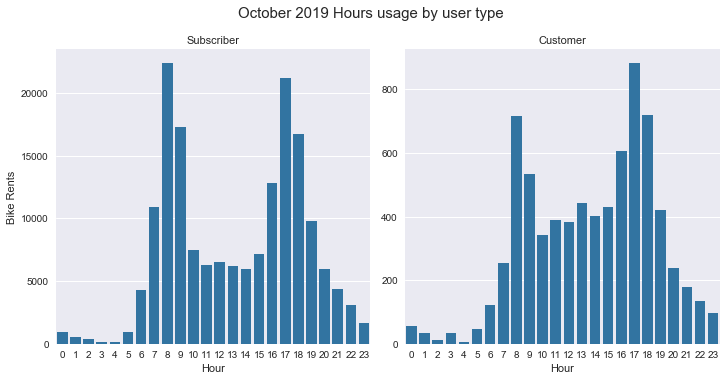

In [483]:
g = sb.catplot(data=df19, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = plot_color)
g.set_axis_labels("Hour", "Bike Rents")
g.set_titles("{col_name}")
g.fig.suptitle('October 2019 Hours usage by user type', y=1.05, fontsize=15);

There is no significant diffrence at popularity of the hours of the rents - it does not matters what type of user it is. Also there is no significant tren change snce October 2018.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset? <br>
When we add user type(Subscriber/Customer) to the analysis we can observe diffrent behaiviours in bike rents. Customers tend to rent bikes more often during weekends than Subscribers. Both user tupes tend to rent bikes at 8-9am and 5-6pm. Also there is no significant diffrence beteween October 18 and Ocotber 19<br>

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?<br>
I have ploted initial univariate investigation of the data wanting to look at the relationship between many pairs of variables but there is nothing interesting.

# Multi-Variate Exploration


Let's look into bike rides by gender and the diffrence between Oct 18 and Oct19

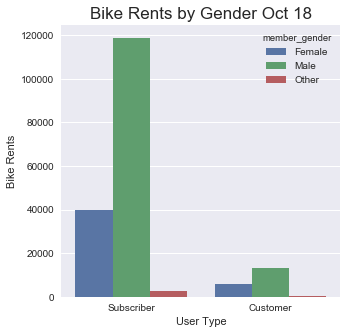

In [423]:
plt.figure(figsize = [5, 5])
orde=df18.user_type.value_counts().index
h_order = ['Female', 'Male' , 'Other']

g = sb.countplot(data=df18, x="user_type", hue="member_gender", hue_order=h_order, order=orde)
g.set_xlabel('User Type')
g.set_ylabel('Bike Rents')
g.set_title('Bike Rents by Gender Oct 18', fontsize=17);

In [410]:
print(orde)

Index(['Subscriber', 'Customer'], dtype='object')


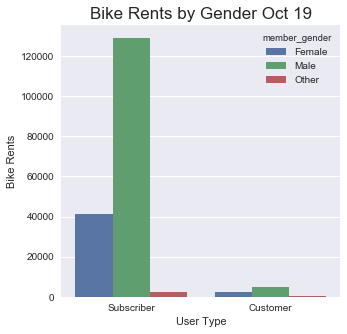

In [424]:
plt.figure(figsize = [5, 5])
orde=df19.user_type.value_counts().index

g = sb.countplot(data=df19, x="user_type", hue="member_gender", hue_order=h_order,order=orde)
g.set_xlabel('User Type')
g.set_ylabel('Bike Rents')
g.set_title('Bike Rents by Gender Oct 19', fontsize=17);

Looks like from both user types males are renting the bikes more often than females and this trend tends to repeat across Subscribers and Customers as well.There's no signifficant diffrence between Oct'18 and Oct'19 there is only more Males bike rents and no change in Females rents since Oct'18.

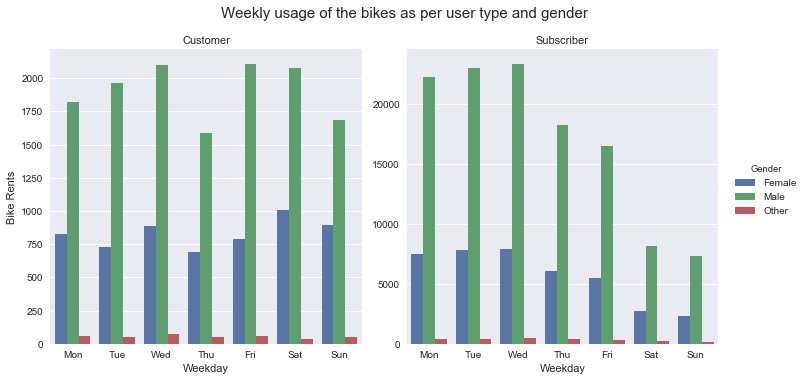

In [448]:

# weekday usege of the bike sharing system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df18, x='start_time_weekday', col="user_type", hue='member_gender',hue_order=h_order,kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Bike Rents")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bikes as per user type and gender October 2018', y=1.05, fontsize=15);

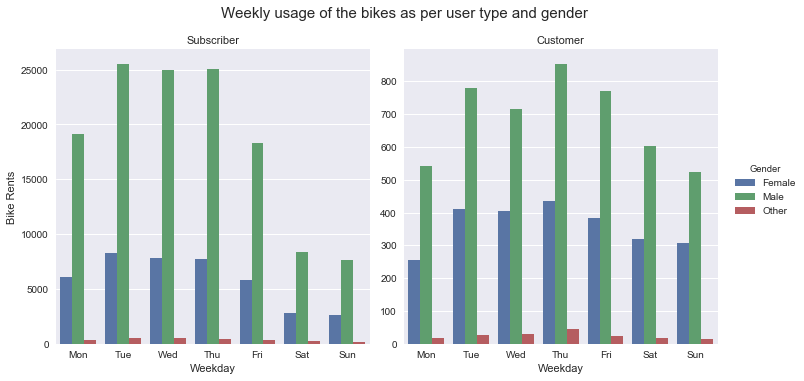

In [449]:
# weekday usege of the bike sharing system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df19, x='start_time_weekday', col="user_type", hue='member_gender',hue_order=h_order,kind='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "Bike Rents")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bikes as per user type and gender October 2019', y=1.05, fontsize=15);

Customers rent the bikes more often during weekends than Subscribers also Customers use the bikes through the week as well within. There is no diffrence in rent trend behaviour between Males and Feamels but there is much more Males useres. There is noticibale drop on Thursdays Ocotber 18 which should be further investigated. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers rent the bikes more often during weekends than Subscribers also Customers use the bikes through the week as well within. There is no diffrence in rent trend behaviour between Males and Feamels but there is much more Males useres. There is noticibale drop on Thursdays Ocotber 18 which should be further investigated. 

### Were there any interesting or surprising interactions between features?


I have checked if there is a trend difference for genders for each user group but there are not much of the differences in trends or behaviours. The only diffrence is that there is way more Males renting the bikes than Feamels which I think is surprise.
